<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1499 non-null   int64  
 1   gender             1395 non-null   float64
 2   chest_pain_type    1499 non-null   int64  
 3   blood_pressure     1499 non-null   int64  
 4   cholesterol        1499 non-null   int64  
 5   max_heart_rate     1499 non-null   int64  
 6   exercise_angina    1499 non-null   int64  
 7   plasma_glucose     1346 non-null   float64
 8   skin_thickness     1352 non-null   float64
 9   insulin            1353 non-null   float64
 10  bmi                1499 non-null   float64
 11  diabetes_pedigree  1499 non-null   float64
 12  hypertension       1499 non-null   int64  
 13  heart_disease      1499 non-null   int64  
 14  residence_type     1387 non-null   object 
 15  smoking_status     1499 non-null   object 
dtypes: float64(6), int64(8),

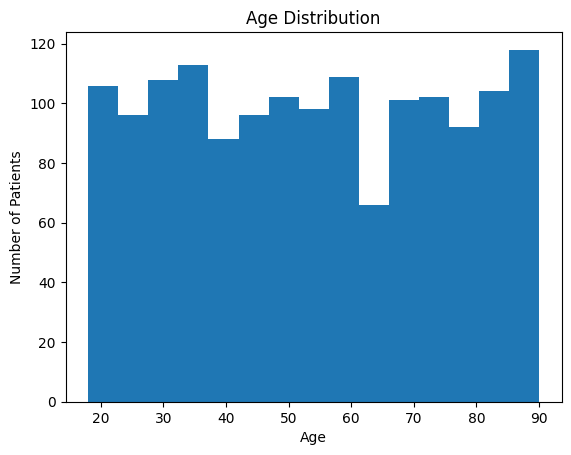

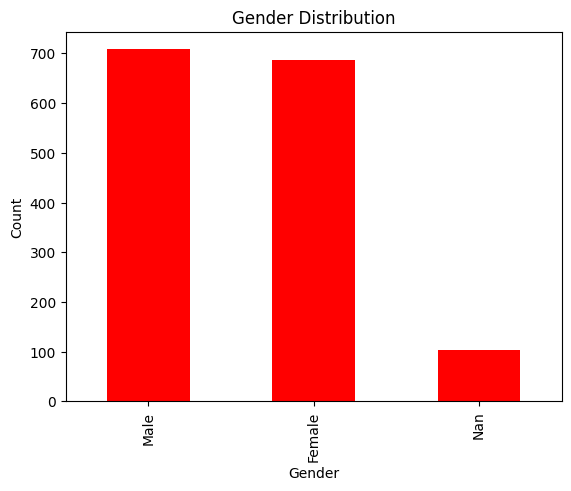

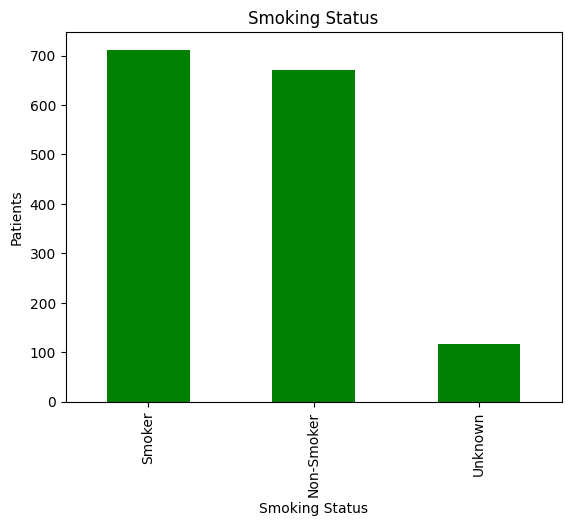

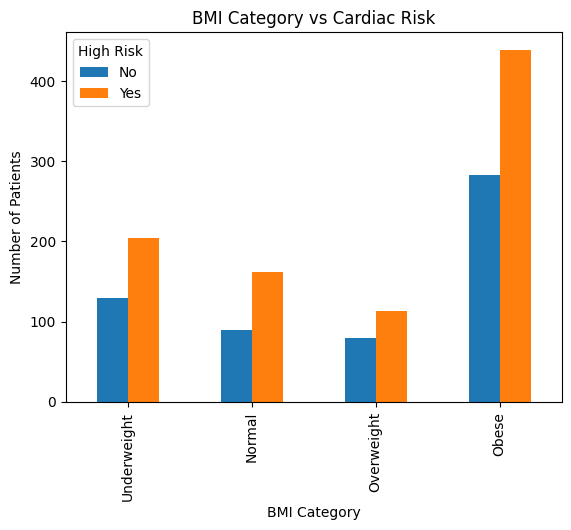

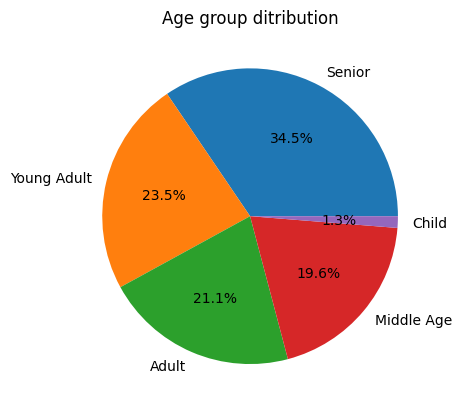

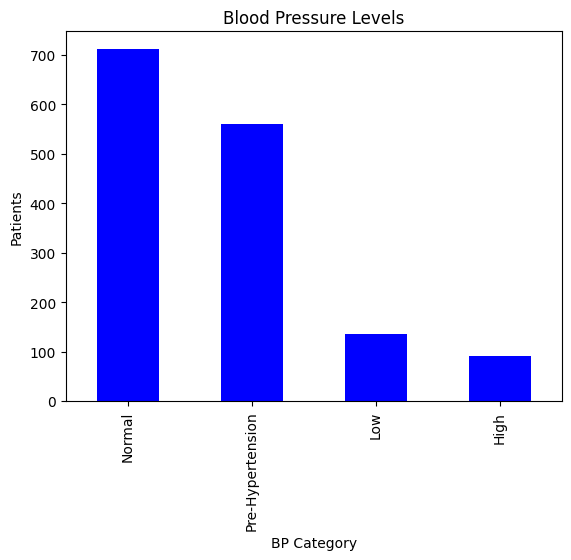

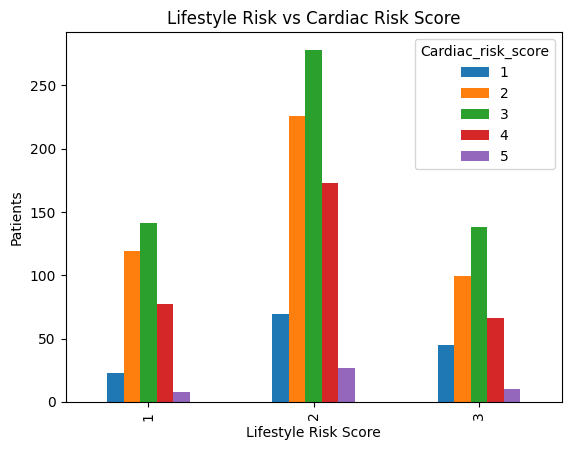

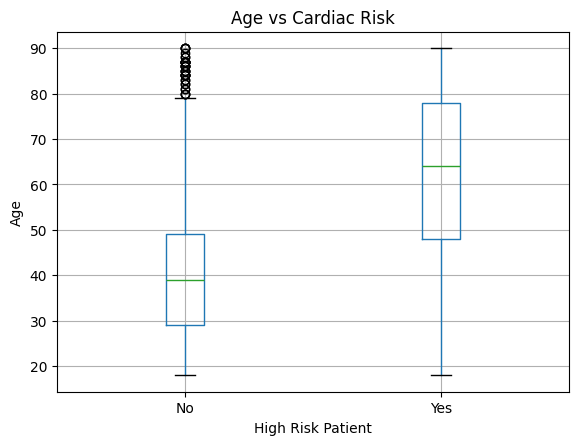

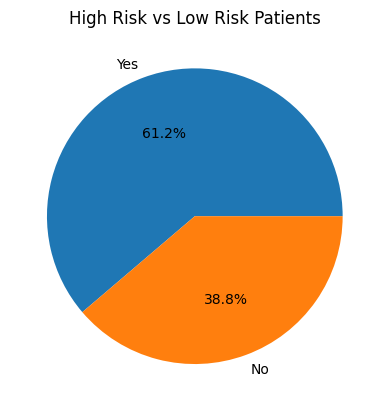

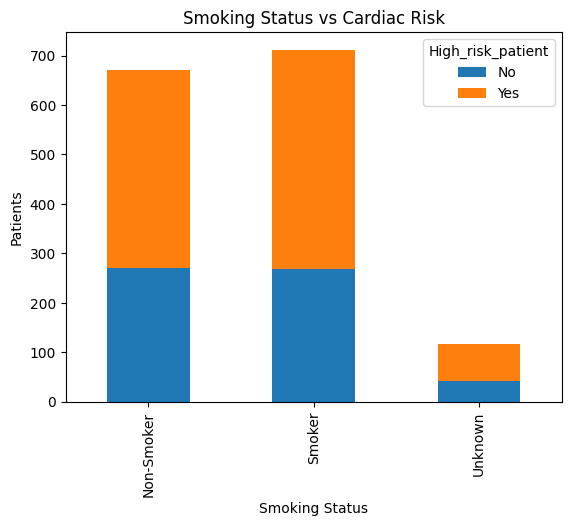

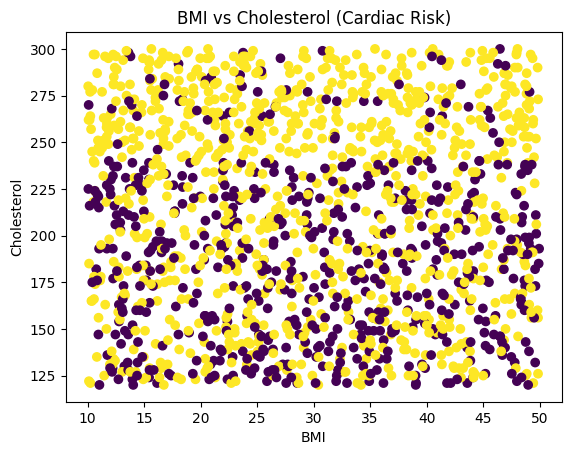

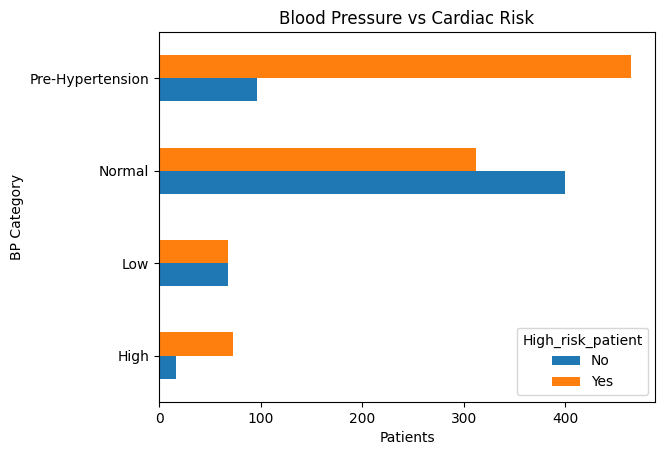

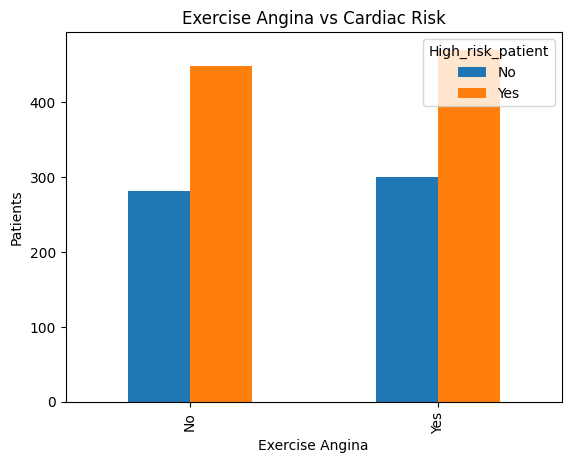

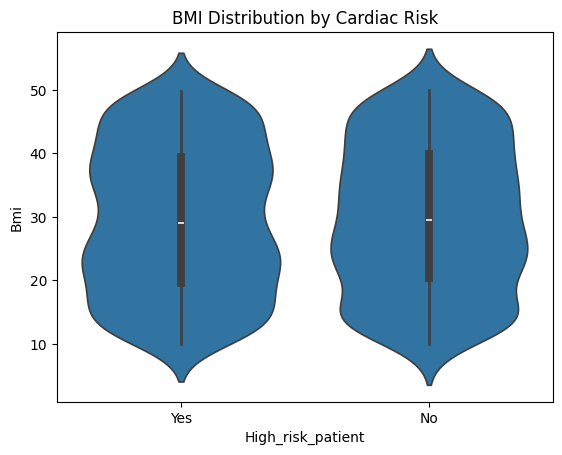

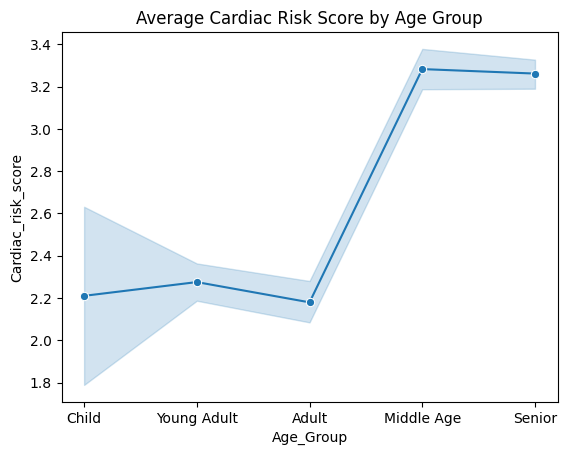

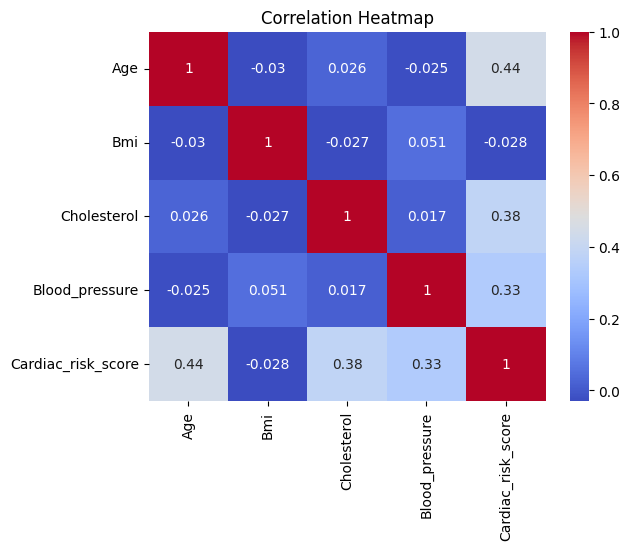

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV File
df=pd.read_csv('patient_dataset.csv')  
# df 
# # To display top rows
df.head()
# # Displays the size of the dataset.
df.shape
df.info()
#  # displays all columns
df.describe(include='all')
# check missing values in each column of a DataFrame
df.isna().sum()

# List of numerical columns where missing values need to be handled
num_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate','chest_pain_type',
    'plasma_glucose', 'skin_thickness', 'insulin', 'bmi']
# Replace missing values with the median of that column
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# # separating category columns and filling with null values
cat_mode_cols = [ 'diabetes_pedigree','exercise_angina',
    'hypertension', 'heart_disease']
# # Fill missing values in categorical columns using the most frequent (mode) value of each column
for col in cat_mode_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Capitalizing column names
df.columns=df.columns.str.capitalize()
df
# Converts all values to string,Removes extra spaces & capitalizes the first letter,replace blanks with unknown and 0.0- Male & 0.1- Female
df['Gender']=df['Gender'].astype('str').str.strip().str.capitalize()
df['Gender'].fillna('Unknown', inplace=True)
df['Gender'].replace({ '1.0':'Male','0.0':'Female' },inplace=True)

# Replaceing blanks with unknown
df['Residence_type'].fillna('Unknown', inplace=True)
df['Smoking_status'].fillna('Unknown', inplace=True)

# Converts all values to string,Removes extra spaces & capitalizes the first letter,replace blanks with unknown and 0- No & 1- Yes
df['Exercise_angina']=df['Exercise_angina'].astype('str').str.strip().str.capitalize()
df['Exercise_angina'].replace({ '1':'Yes','0':'No' },inplace=True)

# Converts all values to string,Removes extra spaces & capitalizes the first letter,replace blanks with unknown and 0- No & 1- Yes
df['Hypertension']=df['Hypertension'].astype('str').str.strip().str.capitalize()
df['Hypertension'].replace({ '1':'Yes','0':'No' },inplace=True)

# Converts all values to string,Removes extra spaces & capitalizes the first letter,replace blanks with unknown and 0- No & 1- Yes
df['Heart_disease']=df['Heart_disease'].astype('str').str.strip().str.capitalize()
df['Heart_disease'].replace({ '1':'Yes','0':'No' },inplace=True)
# data type after conversion
# print(df.dtypes)

# Created a new column for 'Age_Group' by grouping Age values into ranges
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 35, 50, 65, 120],
    labels=['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

# Created a new column for 'Bmi_Category' by grouping BMI values into ranges
df['Bmi_Category'] = pd.cut(
    df['Bmi'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
# Created a new column for 'Bp_Category' by grouping  Blood_pressure values into ranges
def Blood_pressure(val):
    if val <= 90:
        return 'Low'
    elif val <= 140:
        return 'Normal'
    elif val <= 200:
        return 'Pre-Hypertension'
    else:
        return 'High'
df['Bp_Category'] = df['Blood_pressure'].apply(Blood_pressure)

#  Created a new column for 'Cholesterol_Level' by grouping Cholesterol  values into ranges
def Cholesterol(val):
    if val <= 200:
        return 'Normal'
    elif val <= 240:
        return 'Borderline'
    else:
        return 'High'

df['Cholesterol_Level'] = df['Cholesterol'].apply(Cholesterol)

# Created a new column 'Heart_rate_status' based on 'Max_heart_rate' values
df['Heart_rate_status'] = np.where(
    df['Max_heart_rate'] < 100, 'Low',
    np.where(df['Max_heart_rate'] <= 160, 'Normal', 'High'))

# Created a new column 'Lifestyle_risk' based on 'Smoking_status', 'Bmi' & 'Exercise_angina' values
df['Lifestyle_risk'] = (
    (df['Smoking_status'] != 'Never').astype(int) +
    (df['Bmi'] >= 30).astype(int) +
    (df['Exercise_angina'] == 'Yes').astype(int))

# Created a new column 'Metabolic_risk' indicates high blood sugar OR indicates family history of diabetes if 
# either condition is true, the value is set to 1 else 0
df['Metabolic_risk'] = np.where(
    (df['Plasma_glucose'] > 125) | (df['Diabetes_pedigree'] == 1),1, 0)

# created a new column Cardiac_risk_score that calculates a heart risk score for each person based on multiple health conditions
# if any condition satisfies it Adds 1 point.
df['Cardiac_risk_score'] = (
    (df['Age'] > 50).astype(int) +
    (df['Cholesterol'] > 240).astype(int) +
    (df['Blood_pressure'] > 140).astype(int) +
    (df['Smoking_status'] != 'Never').astype(int) +
    (df['Heart_disease'] == 'Yes').astype(int))

df['High_risk_patient'] = np.where(df['Cardiac_risk_score'] >= 3, 'Yes', 'No')

# loaded cleaned csv file 
df.to_csv("patient_dataset_cleaned.csv", index=False)
df

#Age distribution

plt.hist(df['Age'], bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


# #Gender distribution
df['Gender'].value_counts().plot(kind='bar',color='Red')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# #Smoking status distribution
df['Smoking_status'].value_counts().plot(kind='bar',color='Green')
plt.title('Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Patients')
plt.show()

# #BMI Category vs Cardiac Risk
pd.crosstab(df['Bmi_Category'], df['High_risk_patient']).plot(kind='bar')
plt.title('BMI Category vs Cardiac Risk')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.legend(title='High Risk')
plt.show()

#Age group distribution
df['Age_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age group ditribution')
plt.ylabel('')
plt.show()


# #Blood Pressure category
df['Bp_Category'].value_counts().plot(kind='bar',color='Blue')
plt.title('Blood Pressure Levels')
plt.xlabel('BP Category')
plt.ylabel('Patients')
plt.show()

# #Lifestyle Risk vs Cardiac Risk Score
pd.crosstab(df['Lifestyle_risk'], df['Cardiac_risk_score']).plot(kind='bar')
plt.title('Lifestyle Risk vs Cardiac Risk Score')
plt.xlabel('Lifestyle Risk Score')
plt.ylabel('Patients')
plt.show()

# #Age vs Cardiac Risk
df.boxplot(column='Age', by='High_risk_patient')
plt.title('Age vs Cardiac Risk')
plt.suptitle('')
plt.xlabel('High Risk Patient')
plt.ylabel('Age')
plt.show()


# #High Risk vs Low Risk
df['High_risk_patient'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('High Risk vs Low Risk Patients')
plt.ylabel('')
plt.show()

# #Smoking Status vs Cardiac Risk
pd.crosstab(df['Smoking_status'], df['High_risk_patient']).plot(kind='bar', stacked=True)
plt.title('Smoking Status vs Cardiac Risk')
plt.xlabel('Smoking Status')
plt.ylabel('Patients')
plt.show()



# #BMI vs Cholesterol (Cardiac Risk

risk_color = df['High_risk_patient'].map({'Yes':1,'No':0})

plt.scatter(df['Bmi'], df['Cholesterol'], c=risk_color)
plt.title('BMI vs Cholesterol (Cardiac Risk)')
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.show()

# #Blood Pressure vs Cardiac Risk
pd.crosstab(df['Bp_Category'], df['High_risk_patient']).plot(kind='barh')
plt.title('Blood Pressure vs Cardiac Risk')
plt.xlabel('Patients')
plt.ylabel('BP Category')
plt.show()


# #Exercise Angina vs Cardiac Risk
pd.crosstab(df['Exercise_angina'], df['High_risk_patient']).plot(kind='bar')
plt.title('Exercise Angina vs Cardiac Risk')
plt.xlabel('Exercise Angina')
plt.ylabel('Patients')
plt.show()


# #BMI vs High Risk Patient
sns.violinplot(x='High_risk_patient', y='Bmi', data=df)
plt.title('BMI Distribution by Cardiac Risk')
plt.show()


# #Avg Cardiac Risk Score by Age Group
sns.lineplot(x='Age_Group',y='Cardiac_risk_score',data=df,estimator='mean',marker='o')
plt.title('Average Cardiac Risk Score by Age Group')
plt.show()

# #Heatmap
corr = df[['Age','Bmi','Cholesterol','Blood_pressure','Cardiac_risk_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

